# True Fake News 

In [1]:
# importing required libraries

# basic handling 
import pandas as pd
import numpy as np

# text preprocessing
import re
import nltk

from nltk.corpus import stopwords # to remove common, meanningless words
from nltk.stem import PorterStemmer # for stemming
from nltk.stem import WordNetLemmatizer # for lemmatizing
stemmer= PorterStemmer()
lemmatizer= WordNetLemmatizer()

# feature extraction
from sklearn.feature_extraction.text import CountVectorizer # for BOW 
from sklearn.feature_extraction.text import TfidfVectorizer # for TFIDF

# data preprocessing and model building
from sklearn.model_selection import train_test_split

# for model evaluation
from sklearn.metrics import accuracy_score, classification_report

# visualization (optional but useful)
import matplotlib.pyplot as plt
import seaborn as sns

# progress bar for loops and apply
from tqdm import tqdm
tqdm.pandas()

# download nltk resources
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4") # to support multiple langauge in lemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pruch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pruch\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pruch\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
# import dataset named "true"
sach= pd.read_csv("True.csv")
sach.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
# import dataset named "fake"
jhooth= pd.read_csv("Fake.csv")
jhooth.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
# print size for both tha datasets
print(sach.shape)
print(jhooth.shape)

(21417, 4)
(23481, 4)


In [5]:
# label 1 for true dataset
sach["label"]= 1
sach.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [6]:
# label 0 for fake dataset
jhooth["label"]= 0
jhooth.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [7]:
# combining both of the datasets
df= pd.concat([sach, jhooth])
df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [8]:
# check for duplicates
df.duplicated().sum()

209

In [9]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [10]:
# recheck for duplicates
df.duplicated().sum()

0

In [11]:
# reset the index
df.reset_index(drop=True, inplace=True)

In [12]:
df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44684,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44685,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44686,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44687,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [13]:
# check for null values
df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [14]:
# count for label column, frequency for true and fake
df["label"].value_counts()

label
0    23478
1    21211
Name: count, dtype: int64

In [15]:
# function for text preprocessing / text cleaning

def clean(doc):

    # lets define a regex to match special character and digits
    regex= "[^a-zA-Z]"
    doc= re.sub(regex, " ", doc)

    # covert to lowercase
    doc=doc.lower()

    # Tokenization
    tokens= nltk.word_tokenize(doc)

    # stopword removal
    stop_words= set(stopwords.words("english"))
    filtered_tokens= [word for word in tokens if word not in stop_words]

    # lemmatize
    lemmatizer= WordNetLemmatizer()
    lemmatized_tokens= [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # join and return
    return " ".join(lemmatized_tokens)

In [16]:
# apply text preprocessing function on text data
df["Cleaned_text"]= df["text"].apply(lambda x: clean(x))

In [17]:
df.head()

,title,text,subject,date,label,Cleaned_text
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,washington reuters head conservative republica...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,washington reuters transgender people allowed ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,washington reuters special counsel investigati...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,washington reuters trump campaign adviser geor...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,seattle washington reuters president donald tr...


In [18]:
df.shape

(44689, 6)

In [19]:
df.label.value_counts()

label
0    23478
1    21211
Name: count, dtype: int64

In [20]:
# taking the count for subject column
df.subject.value_counts()

subject
politicsNews       11220
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

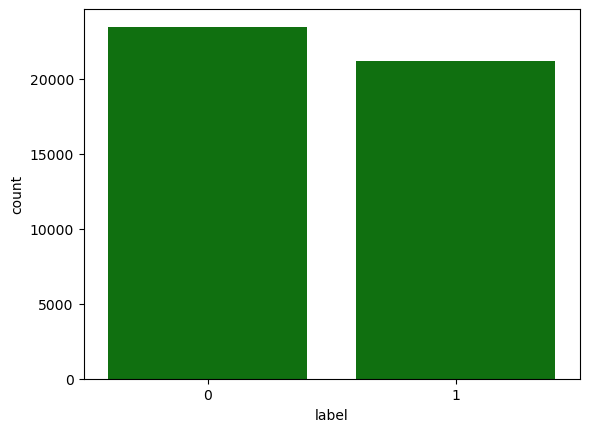

In [21]:
# check data balance by visualization
# countplot for labels
sns.countplot(x="label", data=df, color="green")

## Observation: there's no big difference in o and 1 label, but fake news (0 label) has more frequency 

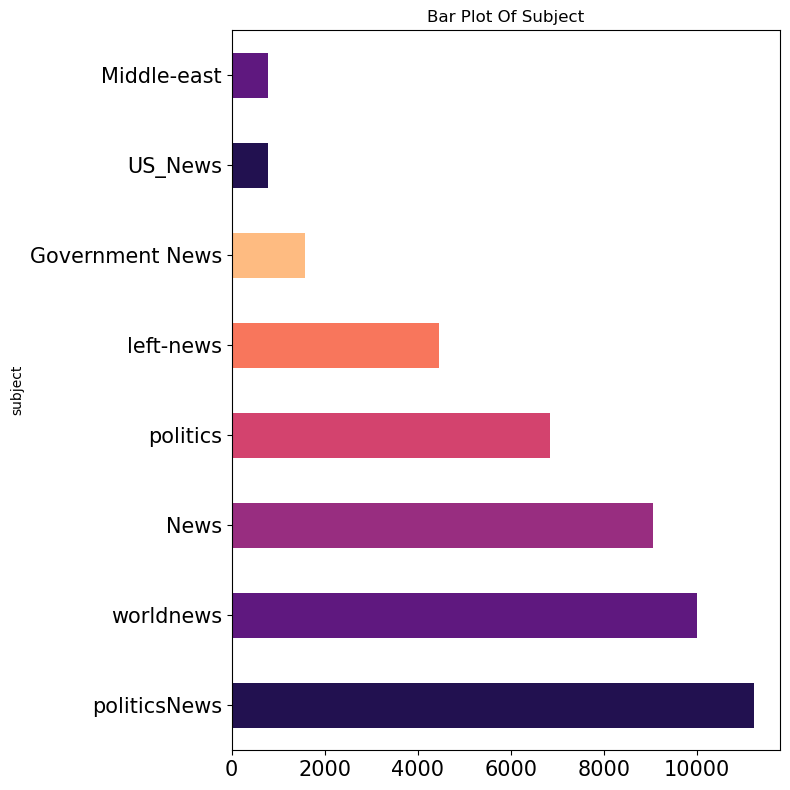

In [22]:
# bar plot for subjects 
plt.figure(figsize=(8,8))
df["subject"].value_counts().plot.barh(color=sns.color_palette("magma"), fontsize= 15)
plt.title(f"Bar Plot Of Subject")
plt.tight_layout()
plt.show()

## observation:
- As we can see Politics News has the highest frequency, on the other side Middle east and US News has the lowest.
- also politics has average range 

<Axes: xlabel='count', ylabel='subject'>

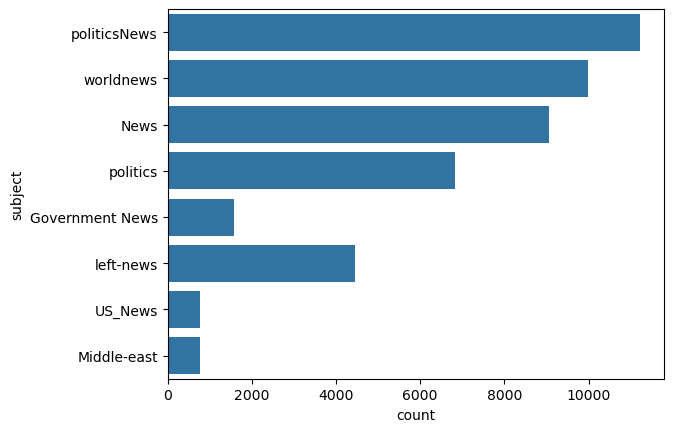

In [23]:
# counplot for subjects
sns.countplot(df.subject)

In [24]:
# create counter to cunt all unique words
from collections import Counter

all_words= " ".join(df["Cleaned_text"]).split()
count_of_words= Counter(all_words)

In [25]:
count_of_words

Counter({'trump': 134238,
         'said': 131629,
         'u': 71381,
         'state': 60897,
         'president': 56825,
         'would': 54814,
         'people': 41836,
         'year': 41430,
         'republican': 39622,
         'one': 39047,
         'also': 31174,
         'new': 31174,
         'government': 29384,
         'clinton': 29374,
         'reuters': 29132,
         'time': 28827,
         'donald': 28172,
         'house': 28172,
         'obama': 28169,
         'american': 25594,
         'say': 25535,
         'country': 25425,
         'election': 24919,
         'right': 23987,
         'could': 23790,
         'party': 23648,
         'like': 23427,
         'united': 23381,
         'told': 23193,
         'white': 23090,
         'campaign': 22699,
         'two': 21687,
         'official': 21061,
         'last': 20910,
         'news': 20648,
         'first': 19344,
         'group': 19227,
         'law': 18944,
         'washington': 18639,
     

In [26]:
# converting counter words to dictionary because with counter datatype we cannot plot wordcloud graph
count_of_words= dict(count_of_words)

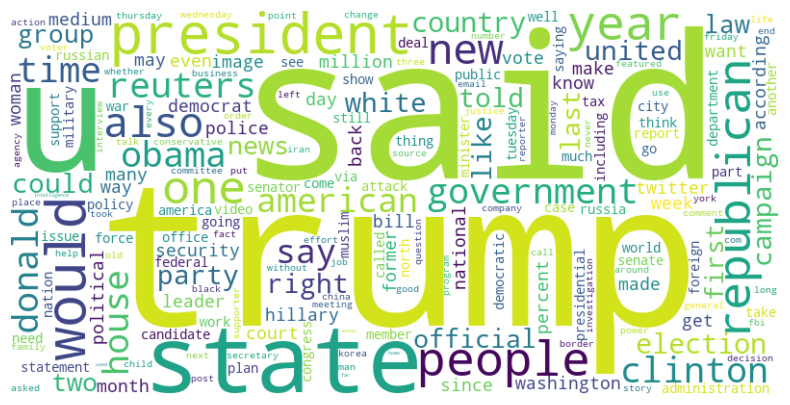

In [27]:
# plotting wordcloud graph for unique words (to visually represent frequency of those words)
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(count_of_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
# check the length of 1st row's all words/tokens without space count
len(df.text[0].split())

749

In [47]:
# defining variables for target variable and train variable
y= df["label"]
x= df[["Cleaned_text"]]

In [30]:
# Splitting into train test split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
# apply vectorization as inn BOW (Bag Of Words)
vocab= CountVectorizer()
x_train_bow= vocab.fit_transform(x_train["Cleaned_text"])
x_train_bow

<35751x97705 sparse matrix of type '<class 'numpy.int64'>'
	with 5597248 stored elements in Compressed Sparse Row format>

In [32]:
print("total unique words: ", len(vocab.vocabulary_))
print("type of train features: ", type(x_train_bow))
print("shape of input data: ", x_train_bow.shape)

total unique words:  97705
type of train features:  <class 'scipy.sparse._csr.csr_matrix'>
shape of input data:  (35751, 97705)


In [33]:
x_train.isna().sum()

Cleaned_text    0
dtype: int64

In [34]:
# check the size 
from sys import getsizeof
print(type(x_train_bow))
print(getsizeof(x_train_bow), "bytes")

<class 'scipy.sparse._csr.csr_matrix'>
48 bytes


# logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train_bow, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [36]:
x_test_bow= vocab.transform(x_test["Cleaned_text"])

In [37]:
y_test_pred= classifier.predict(x_test_bow)

In [38]:
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

0.9947415529201163
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4648
           1       1.00      0.99      0.99      4290

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938



# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
Classifier2 = DecisionTreeClassifier() 
Classifier2.fit(x_train_bow, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [49]:
y_test_pred= Shrufier.predict(x_test_bow)

In [50]:
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

0.9961960170060417
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4648
           1       1.00      1.00      1.00      4290

    accuracy                           1.00      8938
   macro avg       1.00      1.00      1.00      8938
weighted avg       1.00      1.00      1.00      8938



# Naive Bayes

In [44]:
from sklearn.naive_bayes import MultinomialNB
model= MultinomialNB()
model.fit(x_train_bow,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [45]:
y_test_pred= model.predict(x_test_bow)

In [46]:
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

0.9536809129559185
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      4648
           1       0.95      0.95      0.95      4290

    accuracy                           0.95      8938
   macro avg       0.95      0.95      0.95      8938
weighted avg       0.95      0.95      0.95      8938

